In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import efc_1dm as efc
from wfsc import utils

dm1_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
dm2_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')


INFO:numexpr.utils:Note: detected 96 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 96 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


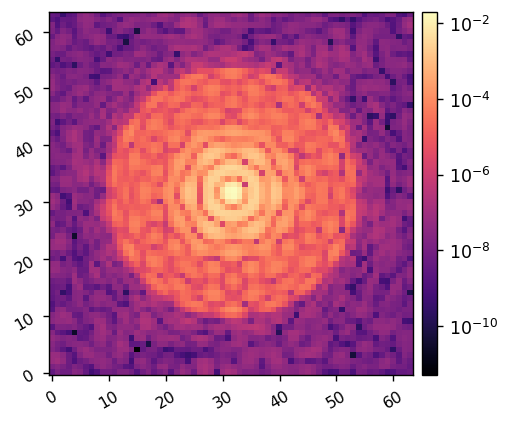

0.020081468425845


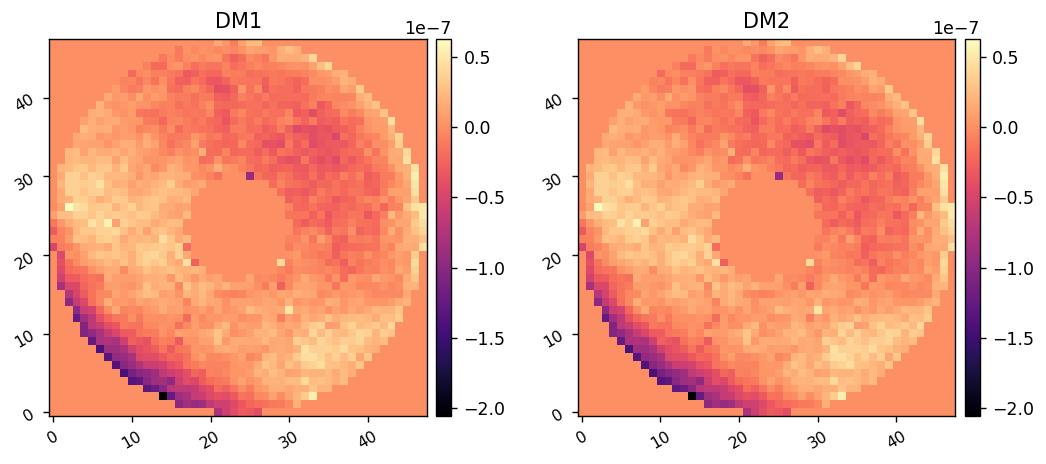

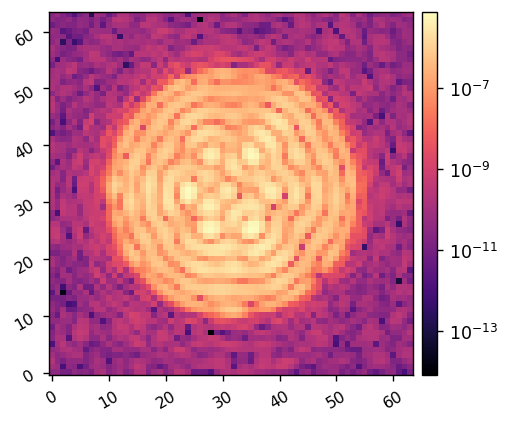

In [19]:
reload(cgi)
sys_unocc = cgi.CGI(cgi_mode='hlc', 
              use_fpm=False,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )

unocc_psf = sys_unocc.snap()

misc.myimshow(unocc_psf, lognorm=True)

Imax_unocc = unocc_psf.max()
print(Imax_unocc)

sys = cgi.CGI(cgi_mode='hlc', 
              use_fpm=True,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )
sys.show_dms()

npsf = sys.npsf
Nact = sys.Nact

ref_psf = sys.snap()

misc.myimshow(ref_psf, lognorm=True)

# Create the dark-hole mask

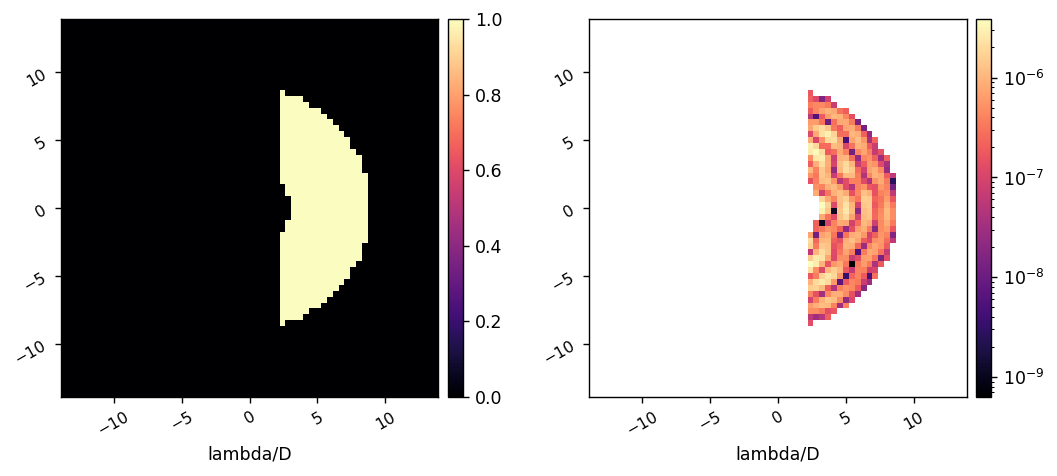

In [5]:
reload(utils)
xfp = np.linspace(-0.5, 0.5, npsf) * npsf * sys.psf_pixelscale_lamD
xf,yf = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 9
rot = 0

# Create the mask that is used to select which region to make dark.
dh_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
    'direction' : '+x',
    'rotation':rot,
    'full':False
}
dh_mask = utils.create_annular_focal_plane_mask(xf, yf, dh_params)

nmask = dh_mask.sum()

misc.myimshow2(dh_mask, ref_psf*dh_mask,  
               pxscl1=sys.psf_pixelscale_lamD, pxscl2=sys.psf_pixelscale_lamD,
               lognorm2=True)

In [4]:
# reload(efc)

# epsilon = 1e-9 # poke amplitudes (DM surface)
# jac = efc.build_jacobian(sys, epsilon, dh_mask.flatten(), display=False)

Building Jacobian.
	Calculated response for mode 1/2304. Elapsed time=0.004 sec.
	Calculated response for mode 2/2304. Elapsed time=0.004 sec.
	Calculated response for mode 3/2304. Elapsed time=0.004 sec.
	Calculated response for mode 4/2304. Elapsed time=0.004 sec.
	Calculated response for mode 5/2304. Elapsed time=0.004 sec.
	Calculated response for mode 6/2304. Elapsed time=0.004 sec.
	Calculated response for mode 7/2304. Elapsed time=0.004 sec.
	Calculated response for mode 8/2304. Elapsed time=0.004 sec.
	Calculated response for mode 9/2304. Elapsed time=0.004 sec.
	Calculated response for mode 10/2304. Elapsed time=0.004 sec.
	Calculated response for mode 11/2304. Elapsed time=0.004 sec.
	Calculated response for mode 12/2304. Elapsed time=0.004 sec.
	Calculated response for mode 13/2304. Elapsed time=0.004 sec.
	Calculated response for mode 14/2304. Elapsed time=0.004 sec.
	Calculated response for mode 15/2304. Elapsed time=0.004 sec.
	Calculated response for mode 16/2304. Elapse

	Calculated response for mode 130/2304. Elapsed time=26.887 sec.
	Calculated response for mode 131/2304. Elapsed time=26.887 sec.
	Calculated response for mode 132/2304. Elapsed time=26.887 sec.
	Calculated response for mode 133/2304. Elapsed time=26.887 sec.
	Calculated response for mode 134/2304. Elapsed time=26.887 sec.
	Calculated response for mode 135/2304. Elapsed time=26.887 sec.
	Calculated response for mode 136/2304. Elapsed time=26.887 sec.
	Calculated response for mode 137/2304. Elapsed time=26.887 sec.
	Calculated response for mode 138/2304. Elapsed time=26.887 sec.
	Calculated response for mode 139/2304. Elapsed time=26.888 sec.
	Calculated response for mode 140/2304. Elapsed time=26.888 sec.
	Calculated response for mode 141/2304. Elapsed time=26.888 sec.
	Calculated response for mode 142/2304. Elapsed time=26.888 sec.
	Calculated response for mode 143/2304. Elapsed time=26.888 sec.
	Calculated response for mode 144/2304. Elapsed time=26.888 sec.
	Calculated response for 

	Calculated response for mode 257/2304. Elapsed time=65.170 sec.
	Calculated response for mode 258/2304. Elapsed time=65.800 sec.
	Calculated response for mode 259/2304. Elapsed time=66.432 sec.
	Calculated response for mode 260/2304. Elapsed time=67.066 sec.
	Calculated response for mode 261/2304. Elapsed time=67.696 sec.
	Calculated response for mode 262/2304. Elapsed time=68.326 sec.
	Calculated response for mode 263/2304. Elapsed time=68.955 sec.
	Calculated response for mode 264/2304. Elapsed time=69.586 sec.
	Calculated response for mode 265/2304. Elapsed time=70.216 sec.
	Calculated response for mode 266/2304. Elapsed time=70.846 sec.
	Calculated response for mode 267/2304. Elapsed time=71.477 sec.
	Calculated response for mode 268/2304. Elapsed time=72.108 sec.
	Calculated response for mode 269/2304. Elapsed time=72.739 sec.
	Calculated response for mode 270/2304. Elapsed time=73.369 sec.
	Calculated response for mode 271/2304. Elapsed time=73.999 sec.
	Calculated response for 

	Calculated response for mode 391/2304. Elapsed time=121.690 sec.
	Calculated response for mode 392/2304. Elapsed time=122.322 sec.
	Calculated response for mode 393/2304. Elapsed time=122.956 sec.
	Calculated response for mode 394/2304. Elapsed time=123.591 sec.
	Calculated response for mode 395/2304. Elapsed time=124.226 sec.
	Calculated response for mode 396/2304. Elapsed time=124.859 sec.
	Calculated response for mode 397/2304. Elapsed time=125.502 sec.
	Calculated response for mode 398/2304. Elapsed time=126.137 sec.
	Calculated response for mode 399/2304. Elapsed time=126.775 sec.
	Calculated response for mode 400/2304. Elapsed time=127.534 sec.
	Calculated response for mode 401/2304. Elapsed time=128.171 sec.
	Calculated response for mode 402/2304. Elapsed time=128.803 sec.
	Calculated response for mode 403/2304. Elapsed time=129.438 sec.
	Calculated response for mode 404/2304. Elapsed time=130.073 sec.
	Calculated response for mode 405/2304. Elapsed time=130.709 sec.
	Calculate

	Calculated response for mode 516/2304. Elapsed time=188.858 sec.
	Calculated response for mode 517/2304. Elapsed time=189.494 sec.
	Calculated response for mode 518/2304. Elapsed time=190.128 sec.
	Calculated response for mode 519/2304. Elapsed time=190.762 sec.
	Calculated response for mode 520/2304. Elapsed time=191.402 sec.
	Calculated response for mode 521/2304. Elapsed time=192.038 sec.
	Calculated response for mode 522/2304. Elapsed time=192.677 sec.
	Calculated response for mode 523/2304. Elapsed time=193.316 sec.
	Calculated response for mode 524/2304. Elapsed time=193.949 sec.
	Calculated response for mode 525/2304. Elapsed time=193.949 sec.
	Calculated response for mode 526/2304. Elapsed time=193.949 sec.
	Calculated response for mode 527/2304. Elapsed time=193.949 sec.
	Calculated response for mode 528/2304. Elapsed time=193.949 sec.
	Calculated response for mode 529/2304. Elapsed time=193.949 sec.
	Calculated response for mode 530/2304. Elapsed time=193.950 sec.
	Calculate

	Calculated response for mode 641/2304. Elapsed time=255.289 sec.
	Calculated response for mode 642/2304. Elapsed time=255.926 sec.
	Calculated response for mode 643/2304. Elapsed time=256.561 sec.
	Calculated response for mode 644/2304. Elapsed time=257.196 sec.
	Calculated response for mode 645/2304. Elapsed time=257.832 sec.
	Calculated response for mode 646/2304. Elapsed time=258.466 sec.
	Calculated response for mode 647/2304. Elapsed time=259.100 sec.
	Calculated response for mode 648/2304. Elapsed time=259.740 sec.
	Calculated response for mode 649/2304. Elapsed time=260.378 sec.
	Calculated response for mode 650/2304. Elapsed time=261.018 sec.
	Calculated response for mode 651/2304. Elapsed time=261.652 sec.
	Calculated response for mode 652/2304. Elapsed time=262.293 sec.
	Calculated response for mode 653/2304. Elapsed time=262.933 sec.
	Calculated response for mode 654/2304. Elapsed time=263.569 sec.
	Calculated response for mode 655/2304. Elapsed time=264.206 sec.
	Calculate

	Calculated response for mode 766/2304. Elapsed time=329.480 sec.
	Calculated response for mode 767/2304. Elapsed time=329.480 sec.
	Calculated response for mode 768/2304. Elapsed time=329.480 sec.
	Calculated response for mode 769/2304. Elapsed time=329.480 sec.
	Calculated response for mode 770/2304. Elapsed time=330.118 sec.
	Calculated response for mode 771/2304. Elapsed time=330.756 sec.
	Calculated response for mode 772/2304. Elapsed time=331.391 sec.
	Calculated response for mode 773/2304. Elapsed time=332.024 sec.
	Calculated response for mode 774/2304. Elapsed time=332.662 sec.
	Calculated response for mode 775/2304. Elapsed time=333.296 sec.
	Calculated response for mode 776/2304. Elapsed time=333.931 sec.
	Calculated response for mode 777/2304. Elapsed time=334.573 sec.
	Calculated response for mode 778/2304. Elapsed time=335.207 sec.
	Calculated response for mode 779/2304. Elapsed time=335.845 sec.
	Calculated response for mode 780/2304. Elapsed time=336.480 sec.
	Calculate

	Calculated response for mode 891/2304. Elapsed time=404.517 sec.
	Calculated response for mode 892/2304. Elapsed time=405.149 sec.
	Calculated response for mode 893/2304. Elapsed time=405.781 sec.
	Calculated response for mode 894/2304. Elapsed time=406.411 sec.
	Calculated response for mode 895/2304. Elapsed time=407.043 sec.
	Calculated response for mode 896/2304. Elapsed time=407.676 sec.
	Calculated response for mode 897/2304. Elapsed time=408.428 sec.
	Calculated response for mode 898/2304. Elapsed time=409.063 sec.
	Calculated response for mode 899/2304. Elapsed time=409.692 sec.
	Calculated response for mode 900/2304. Elapsed time=410.323 sec.
	Calculated response for mode 901/2304. Elapsed time=410.954 sec.
	Calculated response for mode 902/2304. Elapsed time=411.583 sec.
	Calculated response for mode 903/2304. Elapsed time=412.215 sec.
	Calculated response for mode 904/2304. Elapsed time=412.846 sec.
	Calculated response for mode 905/2304. Elapsed time=413.481 sec.
	Calculate

	Calculated response for mode 1015/2304. Elapsed time=480.669 sec.
	Calculated response for mode 1016/2304. Elapsed time=481.307 sec.
	Calculated response for mode 1017/2304. Elapsed time=481.941 sec.
	Calculated response for mode 1018/2304. Elapsed time=482.575 sec.
	Calculated response for mode 1019/2304. Elapsed time=483.211 sec.
	Calculated response for mode 1020/2304. Elapsed time=483.844 sec.
	Calculated response for mode 1021/2304. Elapsed time=484.612 sec.
	Calculated response for mode 1022/2304. Elapsed time=485.252 sec.
	Calculated response for mode 1023/2304. Elapsed time=485.882 sec.
	Calculated response for mode 1024/2304. Elapsed time=486.516 sec.
	Calculated response for mode 1025/2304. Elapsed time=487.149 sec.
	Calculated response for mode 1026/2304. Elapsed time=487.783 sec.
	Calculated response for mode 1027/2304. Elapsed time=488.419 sec.
	Calculated response for mode 1028/2304. Elapsed time=489.055 sec.
	Calculated response for mode 1029/2304. Elapsed time=489.689 

	Calculated response for mode 1138/2304. Elapsed time=559.248 sec.
	Calculated response for mode 1139/2304. Elapsed time=559.882 sec.
	Calculated response for mode 1140/2304. Elapsed time=560.518 sec.
	Calculated response for mode 1141/2304. Elapsed time=561.151 sec.
	Calculated response for mode 1142/2304. Elapsed time=561.783 sec.
	Calculated response for mode 1143/2304. Elapsed time=562.414 sec.
	Calculated response for mode 1144/2304. Elapsed time=563.046 sec.
	Calculated response for mode 1145/2304. Elapsed time=563.679 sec.
	Calculated response for mode 1146/2304. Elapsed time=564.308 sec.
	Calculated response for mode 1147/2304. Elapsed time=564.942 sec.
	Calculated response for mode 1148/2304. Elapsed time=565.575 sec.
	Calculated response for mode 1149/2304. Elapsed time=566.206 sec.
	Calculated response for mode 1150/2304. Elapsed time=566.841 sec.
	Calculated response for mode 1151/2304. Elapsed time=567.481 sec.
	Calculated response for mode 1152/2304. Elapsed time=568.115 

	Calculated response for mode 1261/2304. Elapsed time=637.658 sec.
	Calculated response for mode 1262/2304. Elapsed time=638.293 sec.
	Calculated response for mode 1263/2304. Elapsed time=638.923 sec.
	Calculated response for mode 1264/2304. Elapsed time=639.562 sec.
	Calculated response for mode 1265/2304. Elapsed time=640.192 sec.
	Calculated response for mode 1266/2304. Elapsed time=640.824 sec.
	Calculated response for mode 1267/2304. Elapsed time=641.458 sec.
	Calculated response for mode 1268/2304. Elapsed time=642.094 sec.
	Calculated response for mode 1269/2304. Elapsed time=642.728 sec.
	Calculated response for mode 1270/2304. Elapsed time=643.360 sec.
	Calculated response for mode 1271/2304. Elapsed time=643.990 sec.
	Calculated response for mode 1272/2304. Elapsed time=644.624 sec.
	Calculated response for mode 1273/2304. Elapsed time=645.254 sec.
	Calculated response for mode 1274/2304. Elapsed time=645.886 sec.
	Calculated response for mode 1275/2304. Elapsed time=646.522 

	Calculated response for mode 1384/2304. Elapsed time=715.390 sec.
	Calculated response for mode 1385/2304. Elapsed time=716.023 sec.
	Calculated response for mode 1386/2304. Elapsed time=716.656 sec.
	Calculated response for mode 1387/2304. Elapsed time=717.290 sec.
	Calculated response for mode 1388/2304. Elapsed time=717.924 sec.
	Calculated response for mode 1389/2304. Elapsed time=718.553 sec.
	Calculated response for mode 1390/2304. Elapsed time=719.190 sec.
	Calculated response for mode 1391/2304. Elapsed time=719.820 sec.
	Calculated response for mode 1392/2304. Elapsed time=719.820 sec.
	Calculated response for mode 1393/2304. Elapsed time=719.821 sec.
	Calculated response for mode 1394/2304. Elapsed time=720.455 sec.
	Calculated response for mode 1395/2304. Elapsed time=721.089 sec.
	Calculated response for mode 1396/2304. Elapsed time=721.721 sec.
	Calculated response for mode 1397/2304. Elapsed time=722.357 sec.
	Calculated response for mode 1398/2304. Elapsed time=722.993 

	Calculated response for mode 1507/2304. Elapsed time=789.831 sec.
	Calculated response for mode 1508/2304. Elapsed time=790.469 sec.
	Calculated response for mode 1509/2304. Elapsed time=791.102 sec.
	Calculated response for mode 1510/2304. Elapsed time=791.739 sec.
	Calculated response for mode 1511/2304. Elapsed time=792.375 sec.
	Calculated response for mode 1512/2304. Elapsed time=793.008 sec.
	Calculated response for mode 1513/2304. Elapsed time=793.640 sec.
	Calculated response for mode 1514/2304. Elapsed time=794.276 sec.
	Calculated response for mode 1515/2304. Elapsed time=794.911 sec.
	Calculated response for mode 1516/2304. Elapsed time=795.543 sec.
	Calculated response for mode 1517/2304. Elapsed time=796.179 sec.
	Calculated response for mode 1518/2304. Elapsed time=796.814 sec.
	Calculated response for mode 1519/2304. Elapsed time=797.447 sec.
	Calculated response for mode 1520/2304. Elapsed time=798.084 sec.
	Calculated response for mode 1521/2304. Elapsed time=798.719 

	Calculated response for mode 1630/2304. Elapsed time=863.836 sec.
	Calculated response for mode 1631/2304. Elapsed time=863.836 sec.
	Calculated response for mode 1632/2304. Elapsed time=863.836 sec.
	Calculated response for mode 1633/2304. Elapsed time=863.837 sec.
	Calculated response for mode 1634/2304. Elapsed time=863.837 sec.
	Calculated response for mode 1635/2304. Elapsed time=863.837 sec.
	Calculated response for mode 1636/2304. Elapsed time=864.474 sec.
	Calculated response for mode 1637/2304. Elapsed time=865.107 sec.
	Calculated response for mode 1638/2304. Elapsed time=865.737 sec.
	Calculated response for mode 1639/2304. Elapsed time=866.367 sec.
	Calculated response for mode 1640/2304. Elapsed time=867.000 sec.
	Calculated response for mode 1641/2304. Elapsed time=867.637 sec.
	Calculated response for mode 1642/2304. Elapsed time=868.270 sec.
	Calculated response for mode 1643/2304. Elapsed time=868.902 sec.
	Calculated response for mode 1644/2304. Elapsed time=869.540 

	Calculated response for mode 1753/2304. Elapsed time=930.583 sec.
	Calculated response for mode 1754/2304. Elapsed time=931.217 sec.
	Calculated response for mode 1755/2304. Elapsed time=931.850 sec.
	Calculated response for mode 1756/2304. Elapsed time=932.483 sec.
	Calculated response for mode 1757/2304. Elapsed time=933.114 sec.
	Calculated response for mode 1758/2304. Elapsed time=933.745 sec.
	Calculated response for mode 1759/2304. Elapsed time=934.376 sec.
	Calculated response for mode 1760/2304. Elapsed time=935.006 sec.
	Calculated response for mode 1761/2304. Elapsed time=935.639 sec.
	Calculated response for mode 1762/2304. Elapsed time=936.272 sec.
	Calculated response for mode 1763/2304. Elapsed time=936.901 sec.
	Calculated response for mode 1764/2304. Elapsed time=937.534 sec.
	Calculated response for mode 1765/2304. Elapsed time=938.163 sec.
	Calculated response for mode 1766/2304. Elapsed time=938.792 sec.
	Calculated response for mode 1767/2304. Elapsed time=939.422 

	Calculated response for mode 1879/2304. Elapsed time=992.995 sec.
	Calculated response for mode 1880/2304. Elapsed time=993.626 sec.
	Calculated response for mode 1881/2304. Elapsed time=994.256 sec.
	Calculated response for mode 1882/2304. Elapsed time=994.890 sec.
	Calculated response for mode 1883/2304. Elapsed time=995.522 sec.
	Calculated response for mode 1884/2304. Elapsed time=996.152 sec.
	Calculated response for mode 1885/2304. Elapsed time=996.780 sec.
	Calculated response for mode 1886/2304. Elapsed time=997.409 sec.
	Calculated response for mode 1887/2304. Elapsed time=998.043 sec.
	Calculated response for mode 1888/2304. Elapsed time=998.673 sec.
	Calculated response for mode 1889/2304. Elapsed time=999.304 sec.
	Calculated response for mode 1890/2304. Elapsed time=999.935 sec.
	Calculated response for mode 1891/2304. Elapsed time=1000.566 sec.
	Calculated response for mode 1892/2304. Elapsed time=1001.196 sec.
	Calculated response for mode 1893/2304. Elapsed time=1001.8

	Calculated response for mode 2000/2304. Elapsed time=1052.089 sec.
	Calculated response for mode 2001/2304. Elapsed time=1052.727 sec.
	Calculated response for mode 2002/2304. Elapsed time=1053.364 sec.
	Calculated response for mode 2003/2304. Elapsed time=1053.996 sec.
	Calculated response for mode 2004/2304. Elapsed time=1054.627 sec.
	Calculated response for mode 2005/2304. Elapsed time=1055.259 sec.
	Calculated response for mode 2006/2304. Elapsed time=1055.891 sec.
	Calculated response for mode 2007/2304. Elapsed time=1056.524 sec.
	Calculated response for mode 2008/2304. Elapsed time=1057.155 sec.
	Calculated response for mode 2009/2304. Elapsed time=1057.155 sec.
	Calculated response for mode 2010/2304. Elapsed time=1057.156 sec.
	Calculated response for mode 2011/2304. Elapsed time=1057.156 sec.
	Calculated response for mode 2012/2304. Elapsed time=1057.156 sec.
	Calculated response for mode 2013/2304. Elapsed time=1057.156 sec.
	Calculated response for mode 2014/2304. Elapsed

	Calculated response for mode 2125/2304. Elapsed time=1094.673 sec.
	Calculated response for mode 2126/2304. Elapsed time=1095.310 sec.
	Calculated response for mode 2127/2304. Elapsed time=1095.944 sec.
	Calculated response for mode 2128/2304. Elapsed time=1096.575 sec.
	Calculated response for mode 2129/2304. Elapsed time=1097.207 sec.
	Calculated response for mode 2130/2304. Elapsed time=1097.838 sec.
	Calculated response for mode 2131/2304. Elapsed time=1098.470 sec.
	Calculated response for mode 2132/2304. Elapsed time=1099.106 sec.
	Calculated response for mode 2133/2304. Elapsed time=1099.737 sec.
	Calculated response for mode 2134/2304. Elapsed time=1100.369 sec.
	Calculated response for mode 2135/2304. Elapsed time=1101.008 sec.
	Calculated response for mode 2136/2304. Elapsed time=1101.642 sec.
	Calculated response for mode 2137/2304. Elapsed time=1102.277 sec.
	Calculated response for mode 2138/2304. Elapsed time=1102.909 sec.
	Calculated response for mode 2139/2304. Elapsed

	Calculated response for mode 2278/2304. Elapsed time=1132.942 sec.
	Calculated response for mode 2279/2304. Elapsed time=1133.576 sec.
	Calculated response for mode 2280/2304. Elapsed time=1134.206 sec.
	Calculated response for mode 2281/2304. Elapsed time=1134.838 sec.
	Calculated response for mode 2282/2304. Elapsed time=1135.472 sec.
	Calculated response for mode 2283/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2284/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2285/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2286/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2287/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2288/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2289/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2290/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2291/2304. Elapsed time=1136.103 sec.
	Calculated response for mode 2292/2304. Elapsed

In [7]:
# jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
# fname = 'hlc_39_opds_flatmaps'

# misc.save_pickle(jac_dir/fname, jac, quiet=False)

Saved data to:  /groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians/hlc_39_opds_flatmaps


In [6]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'hlc_39_opds_flatmaps'

jac = misc.load_pickle(jac_dir/fname)
jac.shape

(872, 2304)

# Setup regularization scheme

In [36]:
reload(utils)
reg_fun = utils.beta_reg

reg_conds = np.array([[0, 25, 35, 60, 65],
                      [-2, -3, -2, -4, -2]]) # beta=-4 is the same as 5e-3 for tikhonov

# Run EFC with perfect model

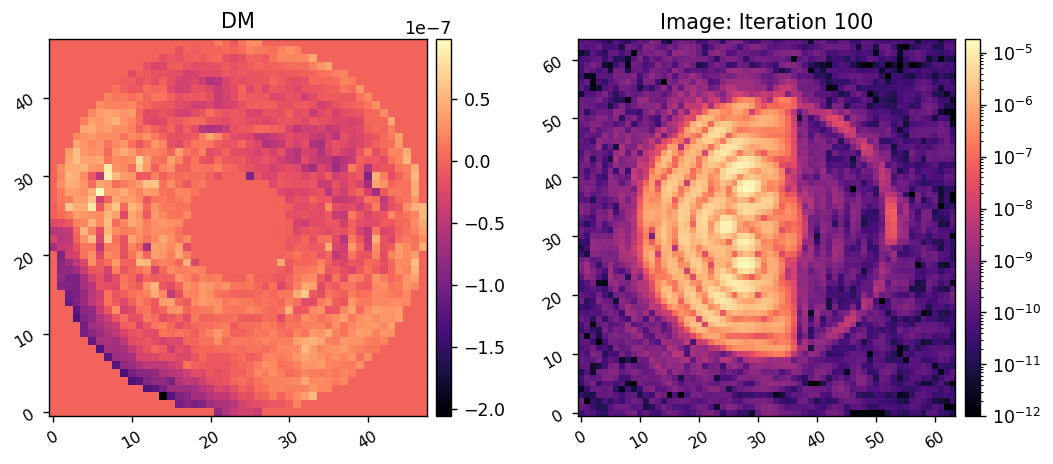

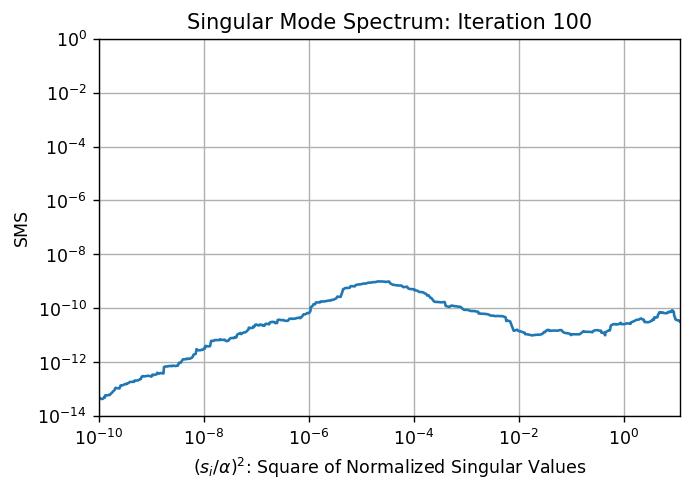

EFC completed in 125.410 sec.


In [37]:
reload(efc)
reload(utils)
sys.reset_dms()
commands1, efields1 = efc.run_efc_perfect(sys,
                                         jac,
                                         reg_fun,
                                         reg_conds,
                                         dh_mask, 
                                         Imax_unocc,
                                         iterations=100, 
                                         display_current=True, 
#                                           display_all=True,
                                         plot_sms=True)